In [1]:
using PlotlyJS
using LinearAlgebra
output = true

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17881487792536212113\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-4180776746406762074\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17881487792536212113\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

true

In [2]:
nla_style = let
    axis = attr(showgrid=true, titlefont_color="#555555",
                titlefont_size=18,
                tickfont_size=18,
                ticks="inside", tickcolor="#555555",
                linecolor="black", mirror="ticks"
                )
    
    layout = Layout(font_size=18,
                    xaxis=axis,
                    yaxis=axis)

    colors = ["#E24A33", "#348ABD", "#988ED5", "#777777", "#FBC15E",
              "#8EBA42", "#FFB5B8"]
    
    gta = attr(marker_line_width=0.5, marker_line_color="#348ABD", marker_color=Cycler(colors))

    Style(layout=layout, global_trace=gta)
end

Style with:
  - layout with fields font, margin, xaxis, and yaxis
  - global_trace: PlotlyAttribute with field marker


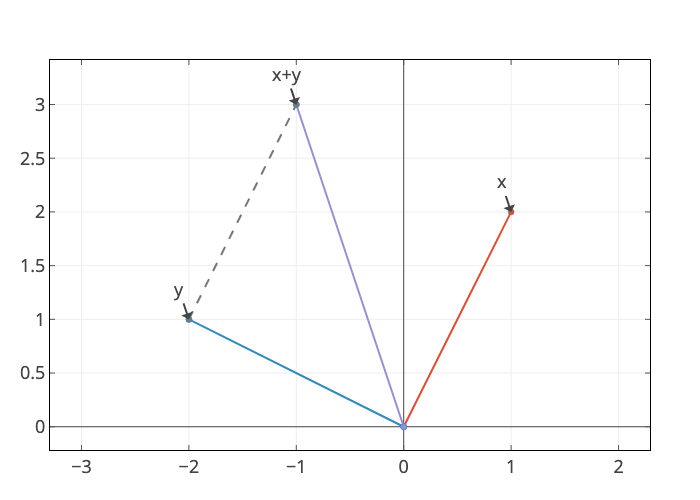

In [3]:
x = [1, 2]
y = [-2, 1]
z = x+y
tr = [scatter(x=[0,x[1]], y=[0,x[2]]), 
      scatter(x=[0,y[1]], y=[0,y[2]]),
      scatter(x=[0,z[1]], y=[0,z[2]]),
      scatter(x=[y[1],z[1]], y=[y[2],z[2]],
        line_dash="dash")]
an = [attr(x=x[1], y=x[2], text="x"),
      attr(x=y[1], y=y[2], text="y"),
      attr(x=z[1], y=z[2], text="x+y")]
la = Layout(yaxis_scaleanchor="x", 
         showlegend=false, annotations=an) 
p1 = plot(tr,la,style=nla_style)

In [4]:
if output
    PlotlyJS.savefig(p1,"fig_la1.pdf")
end

"fig_la1.pdf"

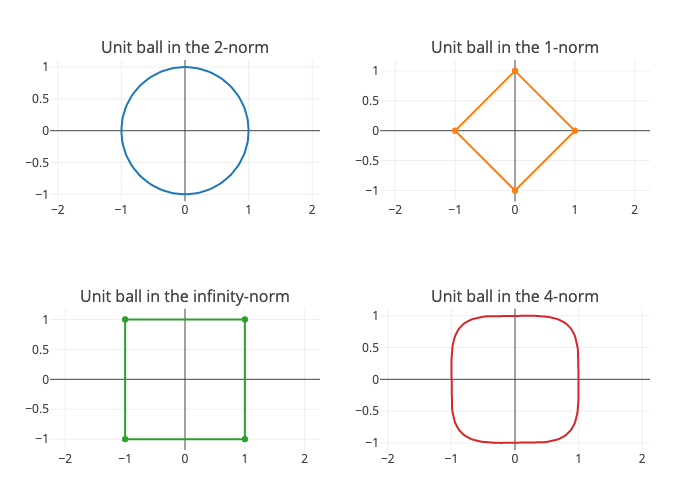

In [5]:
θ = LinRange(0,2π,128)
p1 = plot(
    scatter(x=cos.(θ), y=sin.(θ), showlegend=false),
    Layout(title="Unit ball in the 2-norm",
        yaxis_scaleanchor="x"))

u = LinRange(0,1,2); ru = u[end:-1:1]
p2 = plot(
    scatter(x=[ru; -u; -ru; u], y=[u; ru; -u; -ru], 
        showlegend=false), 
    Layout(title="Unit ball in the 1-norm",
        yaxis_scaleanchor="x2"))

u = LinRange(-1,1,2); ru = u[end:-1:1]
o = [1, 1]
p3 = plot(
    scatter(x=[o; ru; -o; u], y=[u; o; ru; -o],
        showlegend=false), 
    Layout(title="Unit ball in the infinity-norm",
        yaxis_scaleanchor="x3"))

θ = LinRange(0,π/2,32)
p = 4
x = cos.(θ).^(2/p); rx = x[end:-1:1]
y = sin.(θ).^(2/p); ry = y[end:-1:1]
p4 = plot(
    scatter(x=[x; -rx; -x; rx], y=[y; ry; -y; -ry],
        showlegend=false),
    Layout(title="Unit ball in the 4-norm",
        yaxis_scaleanchor="x4"))

P = [p1 p2; p3 p4]

In [6]:
if output
    PlotlyJS.savefig(P,"fig_la2.pdf")
end

"fig_la2.pdf"

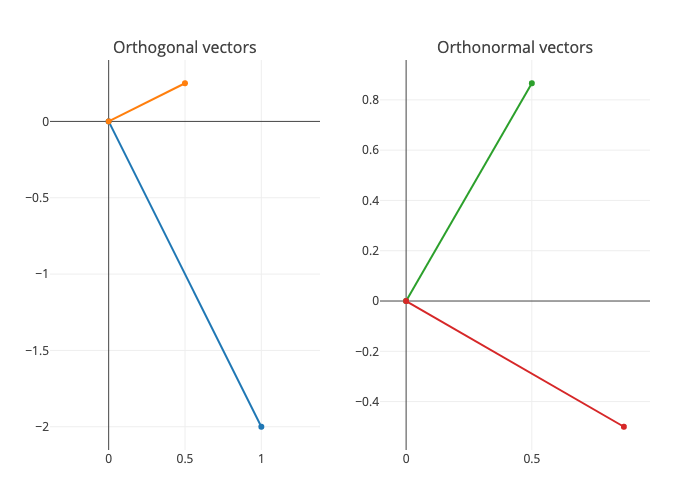

In [7]:
x = [1, -2]; y = [2, 1] / 4
tr = [ scatter(x=[0,x[1]], y=[0,x[2]],
          showlegend=false), 
       scatter(x=[0,y[1]], y=[0,y[2]],
          showlegend=false)
     ]
la = Layout(yaxis_scaleanchor="x",
        title="Orthogonal vectors",
        showlegend=false) 
p1 = plot(tr,la)
        
t = pi/3; 
x = [cos.(t), sin.(t)]; y = [x[2], -x[1]]
tr = [ scatter(x=[0,x[1]], y=[0,x[2]],
          showlegend=false), 
       scatter(x=[0,y[1]], y=[0,y[2]],
          showlegend=false)
     ]
la = Layout(yaxis_scaleanchor="x2",title="Orthonormal vectors") 
p2 = plot(tr,la)

[p1 p2]

In [8]:
if output
    PlotlyJS.savefig([p1 p2],"fig_la3.pdf")
end

"fig_la3.pdf"

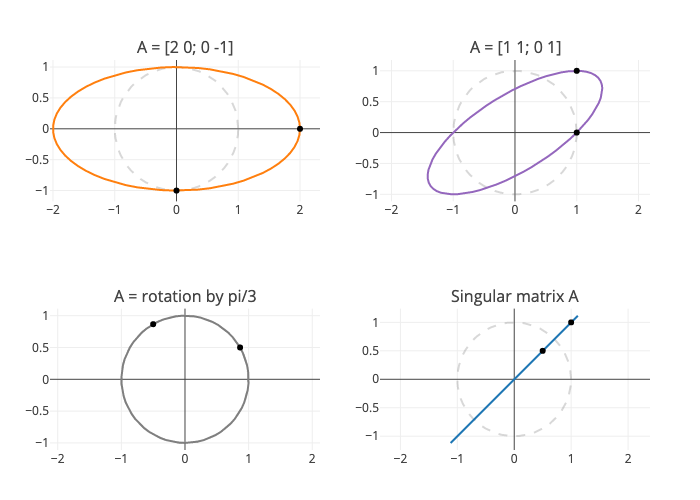

In [9]:
t = LinRange(0,2π,64)
x = [cos.(t)'; sin.(t)']

function plotA(A,x)
    Ax = A*x
    tr = [
      scatter(x=x[1,:], y=x[2,:],
        line_color="gray", line_dash="dash",
        showlegend=false,opacity=0.3),
      scatter(x=Ax[1,:], y=Ax[2,:],
        showlegend=false),
      scatter(x=A[1,:],y=A[2,:],mode="markers",
        marker_color="black", showlegend=false)
     ]
    an = [attr(x=A[1,1],y=A[2,1],text="a1"),
          attr(x=A[1,2],y=A[2,2],text="a2")]
    la = Layout(annotations=an) 
    return plot(tr,la)
end

A = [2 0; 0 -1]
p1 = plotA(A,x)
p1.plot.layout["yaxis_scaleanchor"]="x"
p1.plot.layout["title"]="A = [2 0; 0 -1]"

A = [1 1; 0 1]
p2 = plotA(A,x)
p2.plot.layout["yaxis_scaleanchor"]="x2"
p2.plot.layout["title"]="A = [1 1; 0 1]"

A = [sqrt(3)/2 -1/2; 1/2 sqrt(3)/2]
p3 = plotA(A,x)
p3.plot.layout["yaxis_scaleanchor"]="x3"
p3.plot.layout["title"]="A = rotation by pi/3"

A = [1 1/2; 1 1/2]
p4 = plotA(A,x)
p4.plot.layout["yaxis_scaleanchor"]="x4"
p4.plot.layout["title"]="Singular matrix A"
P = [p1 p2; p3 p4]

In [10]:
if output
    PlotlyJS.savefig(P,"fig_la4.pdf")
end

"fig_la4.pdf"

In [11]:
"""
    quiver(x,u)

Returns a trace, to be plotted using PlotlyJS, corresponding to a quiver plot.

# Arguments
* `x::Matrix{Float64}`: matrix of size 2 x n with the 2D coordinates of the points
* `u::Matrix{Float64}`: matrix of size 2 x n with the 2D arrows to be plotted at x
"""
function quiver(x::Matrix{Float64},u::Matrix{Float64})
    n = size(x,2)
    s = 8
    X = Matrix{Float64}(undef,2,s*n)
    for i=1:n
        k = s*(i-1)
        
        r = x[:,i]
        V = u[:,i]
        
        dist = norm(V)
        arrow_h = 0.1dist     # height of arrowhead
        arrow_w = 0.5arrow_h  # halfwidth of arrowhead
        U1 = V ./ dist        # vector of arrowhead height
        U2 = [-U1[2], U1[1]]  # vector of arrowhead halfwidth
        U1 *= arrow_h
        U2 *= arrow_w
        
        X[:,k+1] = r        
        r += V
        X[:,k+2:k+s] = [r-U1 [NaN, NaN] r r-U1+U2 r-U1-U2 r [NaN, NaN]]
    end
    trace = scatter(fill="toself")
    trace[:x] = X[1,:]; trace[:y] = X[2,:]
    return trace
end

quiver

In [12]:
?quiver

search: quiver



```
quiver(x,u)
```

Returns a trace, to be plotted using PlotlyJS, corresponding to a quiver plot.

# Arguments

  * `x::Matrix{Float64}`: matrix of size 2 x n with the 2D coordinates of the points
  * `u::Matrix{Float64}`: matrix of size 2 x n with the 2D arrows to be plotted at x


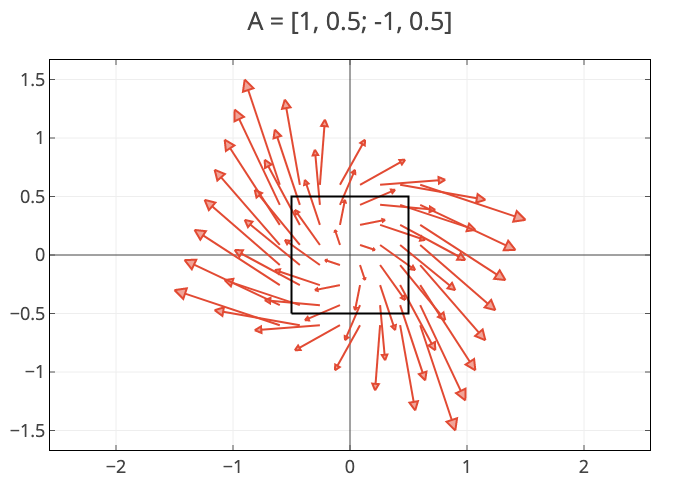

In [13]:
A = [1 1/2; -1 1/2]

n = 8
g = LinRange(-0.6,0.6,n)
x = [ i==1 ? g[1+rem(j,n)] : g[1+div(j,n)] for i=1:2, j=0:n*n-1 ]

u = A*x

t1 = quiver(x,A*x)
t2 = scatter(x=[-1, 1, 1, -1, -1]/2, y=[-1, -1, 1, 1, -1]/2, 
    mode="lines", line_color="black")

p1 = plot([t1, t2], 
    Layout(yaxis_scaleanchor="x", title="A = [1, 0.5; -1, 0.5]",showlegend=false), 
    style=nla_style)

In [14]:
if output
    PlotlyJS.savefig(p1,"fig_la5.pdf")
end

"fig_la5.pdf"

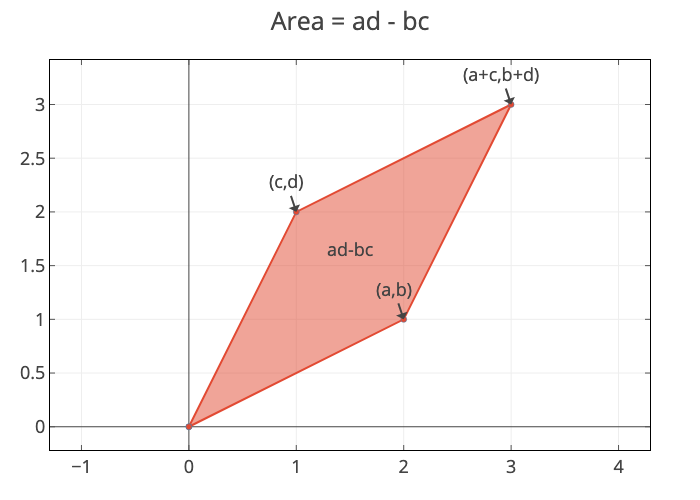

In [15]:
x = [2, 1]
y = [1, 2]
z = x+y
o = [0, 0]
X = [ o x x+y y o ];
t1 = scatter(x=X[1,:],y=X[2,:],fill="toself")
tr = [t1]
an = [attr(x=x[1], y=x[2], text="(a,b)"),
      attr(x=y[1], y=y[2], text="(c,d)"),
      attr(x=z[1], y=z[2], text="(a+c,b+d)"),
      attr(x=.5z[1], y=.55z[2], text="ad-bc", showarrow=false),
     ]
la = Layout(yaxis_scaleanchor="x", title="Area = ad - bc",
         showlegend=false, annotations=an) 
p1 = plot(tr,la,style=nla_style)

In [16]:
if output
    PlotlyJS.savefig(p1,"fig_la6.pdf")
end

"fig_la6.pdf"